In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
cars_data= pd.read_csv('cars_sampled.csv')
cars=cars_data.copy()
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


## Checking missing data and datatypes

In [3]:
print(cars.info())
summary= cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
col=['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen'] #dropping unwanted col
cars=cars.drop(columns=col, axis=1)

cars.drop_duplicates(keep='first', inplace=True) #removing duplicate row data

cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

## Identifying working ranges columnwise

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

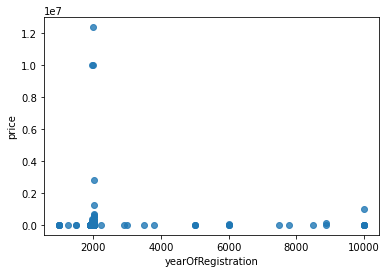

In [5]:
yearwise_counts=cars['yearOfRegistration'].value_counts().sort_index()
sns.regplot(x='yearOfRegistration', y='price', fit_reg=False, data=cars) #working range 1950 to 2018

C:\Users\gatea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

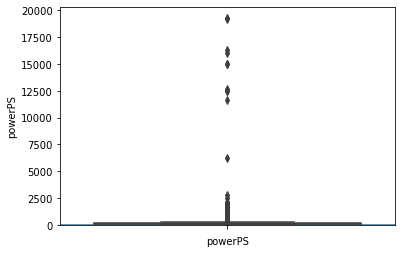

In [14]:
power_count= cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
#sns.regplot(x='powerPS', y='price', fit_reg=False, data=cars)

In [13]:
print(sum(cars['powerPS'] >500))
print(sum(cars['powerPS'] <10))#working range 10 and 500

115
5565


## Working range of data, keeping only working range and dropping rest records (outliers)

In [15]:
cars= cars[
    (cars.yearOfRegistration <=2018)
    & (cars.yearOfRegistration >=1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >=10)
    & (cars.powerPS <= 500)
    ]

#combining year of reg and month of reg

cars['monthOfRegistration']/=12

cars['Age']= (2018- cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']= round(cars['Age'],2)
cars['Age'].describe()

cars=cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)


## Visualizing parameters

### Age

C:\Users\gatea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

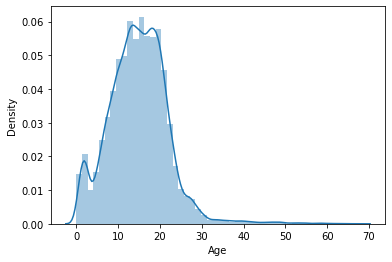

In [21]:
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

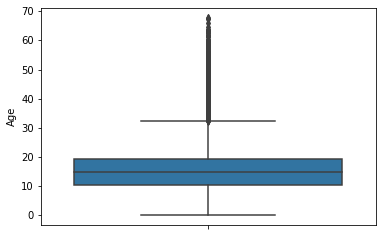

In [20]:
sns.boxplot(y=cars['Age'])

C:\Users\gatea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

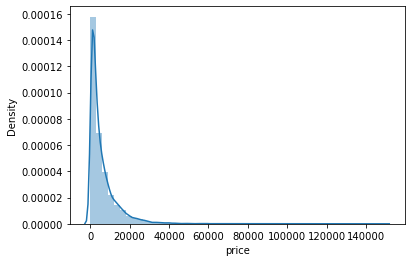

In [22]:
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

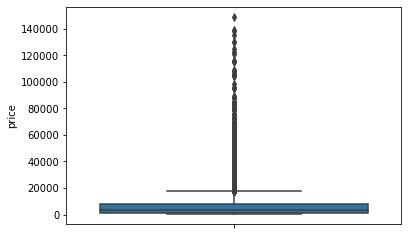

In [23]:
sns.boxplot(y=cars['price'])

C:\Users\gatea\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

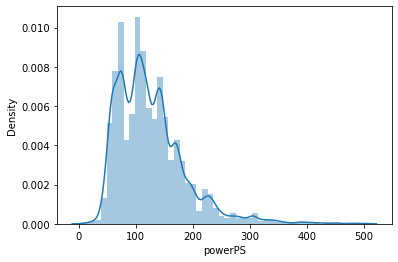

In [24]:
#powerPS
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

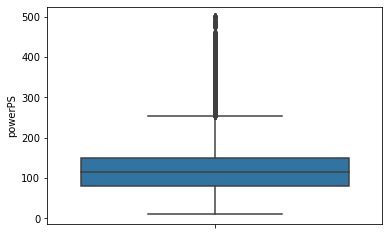

In [25]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

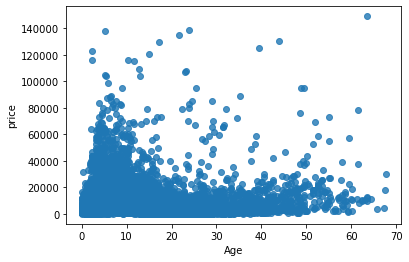

In [26]:
#age vs price
sns.regplot(x='Age', y='price', fit_reg=False, data=cars)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

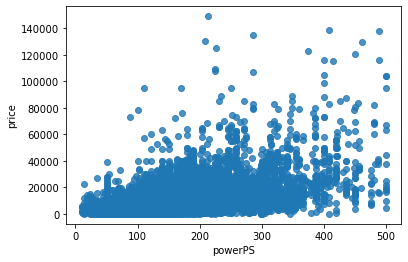

In [27]:
#powerPS vs price
sns.regplot(x='powerPS', y='price', fit_reg=False, data=cars)

## Checking and removing insignificant categorical variables

<AxesSubplot:xlabel='seller', ylabel='count'>

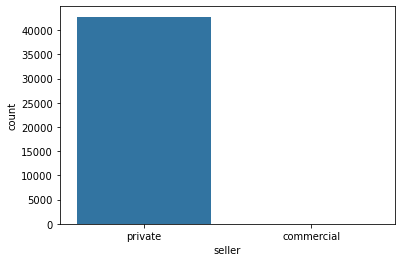

In [28]:
#Variable seller
cars['seller'].value_counts() #gives count
pd.crosstab(cars['seller'], columns='count', normalize=True) #gives percent
sns.countplot(x='seller', data=cars)
#very few cars have 'commercial' seller, hence insignificant

<AxesSubplot:xlabel='offerType', ylabel='count'>

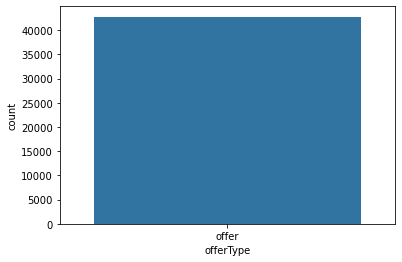

In [29]:
#Variable offerType
cars['offerType'].value_counts() #gives count
pd.crosstab(cars['offerType'], columns='count', normalize=True) #gives percent
sns.countplot(x='offerType', data=cars)
#All cars have same offer, hence insignificant

<AxesSubplot:xlabel='abtest', ylabel='price'>

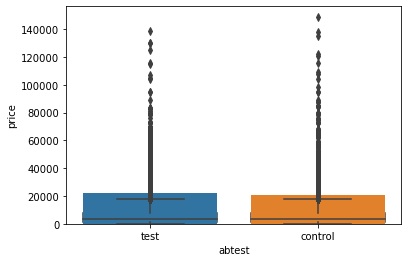

In [32]:
#Variable abtest
cars['abtest'].value_counts() #gives count
pd.crosstab(cars['abtest'], columns='count', normalize=True) #gives percent
sns.countplot(x='abtest', data=cars)
sns.boxplot(x='abtest', y='price', data=cars)
#Price is not affected by this variable, hence insignificant

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

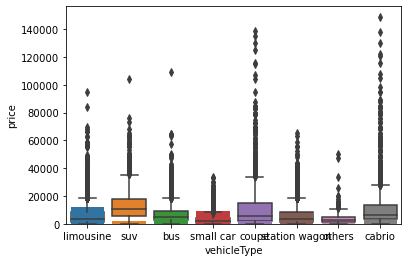

In [31]:
#Variable vehicleType
cars['vehicleType'].value_counts() #gives count
pd.crosstab(cars['vehicleType'], columns='count', normalize=True) #gives percent
sns.countplot(x='vehicleType', data=cars)
sns.boxplot(x='vehicleType', y='price', data=cars)
#affects price 

<AxesSubplot:xlabel='gearbox', ylabel='price'>

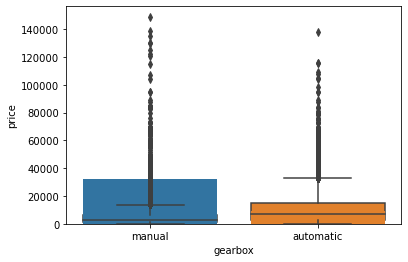

In [34]:
#Variable gearbox
cars['gearbox'].value_counts() #gives count
pd.crosstab(cars['gearbox'], columns='count', normalize=True) #gives percent
sns.countplot(x='gearbox', data=cars)
sns.boxplot(x='gearbox', y='price', data=cars)
#affects price

In [35]:
#removing insignificant variables
col2=['seller','offerType', 'abtest']
cars=cars.drop(columns=col2, axis=1)

In [36]:
#Correlation with price
cars_select1=cars.select_dtypes(exclude=[object])
correlation= cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs()

price        1.000000
powerPS      0.575234
kilometer    0.440138
Age          0.335821
Name: price, dtype: float64

In [37]:
#removing missing values
cars_omit= cars.dropna(axis=0)
cars_omit= pd.get_dummies(cars_omit, drop_first= True)

In [38]:
cars_omit.head()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,86,60000,13.00,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,18750,185,150000,10.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,90,150000,23.17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,136,150000,21.92,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building
### Importing necessary libraries

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [43]:
#separating input and output features
x1= cars_omit.drop(['price'], axis=1, inplace=False)
y1= cars_omit['price'] 

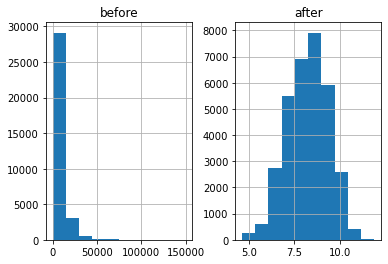

In [44]:
#plotting price and best checking distribution curve
prices= pd.DataFrame({'before':y1, 'after':np.log(y1)})
prices.hist()
#logarithmic values has natural bell shpaed curve, hence transforming price as log values
y1= np.log(y1)

In [45]:
#splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3, random_state=3)

#finding mean for test data value
base_pred= np.mean(y_test)

base_pred= np.repeat(base_pred, len(y_test)) #repeating same value till length of test data

#finding RSME
base_root_mean_squared_error= np.sqrt(mean_squared_error(y_test, base_pred))

## Linear Regression

In [54]:
lgr= LinearRegression(fit_intercept=True)

#model
model_lin1= lgr.fit(X_train, y_train)

#predicting model on test set
cars_predictions_lin1= lgr.predict(X_test)

#computing MSE & RMSE
lin_mse1= mean_squared_error(y_test, cars_predictions_lin1)
lin_mse1= np.sqrt(lin_mse1)
print(lin_mse1)

0.54554812665138


In [55]:
#R squared value - checks how good is the model able to explain the variablity
r2_lin_test1= model_lin1.score(X_test, y_test)
r2_lin_train1= model_lin1.score(X_train, y_train)
print(r2_lin_test1, r2_lin_train1) #should be same or close

0.7658615091649279 0.7800936978183916


count    9866.000000
mean        0.003352
std         0.545565
min        -5.796435
25%        -0.260941
50%         0.041057
75%         0.301637
max         4.547147
Name: price, dtype: float64

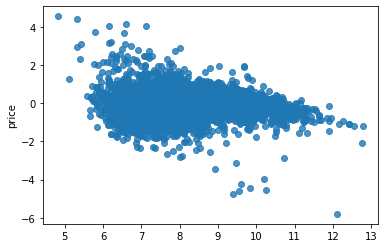

In [49]:
#regression diagnostics- residual plot analysis
residuals1= y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, fit_reg=False) #values should be closer to 0
residuals1.describe() #mean of errors is near 0, shows good indication that predicted and actual values are close

## Random Forest

In [52]:
#model parameters
rf= RandomForestRegressor(n_estimators=100, max_depth=100, 
                          min_samples_split=10, min_samples_leaf=4,
                          random_state=1)

#model
model_rf1= rf.fit(X_train, y_train)

#predicting model on test set
cars_prediction_rf1 = rf.predict(X_test)

#computing MSE & RMSE
rf_mse1= mean_squared_error(y_test, cars_prediction_rf1)
rf_rmse1= np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [53]:
# R squared value
r2_rf_test1= model_rf1.score(X_test, y_test)
r2_rf_train1= model_rf1.score(X_train, y_train)
print(r2_rf_test1, r2_rf_train1)

0.8504018147750623 0.9202494705146291


count    9866.000000
mean        0.006136
std         0.436053
min        -4.751571
25%        -0.189133
50%         0.029780
75%         0.232557
max         2.873143
Name: price, dtype: float64

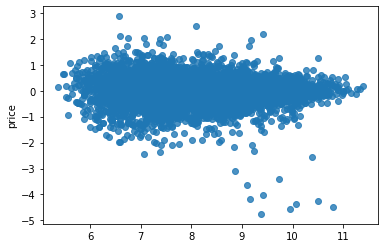

In [56]:
#regression diagnostics- residual plot analysis
residuals2= y_test-cars_prediction_rf1
sns.regplot(x=cars_prediction_rf1, y=residuals2, fit_reg=False) #values should be closer to 0
residuals2.describe() #mean of errors is near 0, shows good indication that predicted and actual values are close

#  Conclusion: 

## For this dataset, Random Forest is more accurate as compared to Linear Regression because: 
## LOW ~> Root Mean Squared Error (RMSE)
## LOW ~> Standard deviation of Residual Errors
## HIGH ~> R squared values